In [1]:
import pandas as pd
import numpy as np
import matplotlib as plt
import statsmodels.api as sm
import scipy.stats as stats
import datetime

from pylab import *
from scipy.io import loadmat
df=pd.read_csv("OldTampaBay.csv")

In [2]:
df.head()

,Day,Time,WLevel,Sigma,O,F,R,L,Quality
0,1,00:00,0.908,0.002,0,0,0,0,v
1,1,00:06,0.911,0.004,0,0,0,0,v
2,1,00:12,0.910,0.002,0,0,0,0,v
3,1,00:18,0.915,0.001,0,0,0,0,v
4,1,00:24,0.916,0.002,0,0,0,0,v


In [3]:
df.tail()

,Day,Time,WLevel,Sigma,O,F,R,L,Quality
6955,29,23:30,0.700,0.003,0,0,0,0,v
6956,29,23:36,0.699,0.002,0,0,0,0,v
6957,29,23:42,0.694,0.003,0,0,0,0,v
6958,29,23:48,0.691,0.004,0,0,0,0,v
6959,29,23:54,0.682,0.003,0,0,0,0,v


In [4]:
df.describe()

,Day,WLevel,Sigma,O,F,R,L
count,6960.000000,6960.000000,6960.000000,6960.000000,6960.000000,6960.000000,6960.0
mean,15.000000,0.429895,0.008591,0.003161,0.000287,0.000862,0.0
std,8.367201,0.272984,0.014852,0.056137,0.016950,0.029350,0.0
min,1.000000,-0.305000,0.000000,0.000000,0.000000,0.000000,0.0
25%,8.000000,0.229000,0.003000,0.000000,0.000000,0.000000,0.0
50%,15.000000,0.436000,0.005000,0.000000,0.000000,0.000000,0.0
75%,22.000000,0.623000,0.011000,0.000000,0.000000,0.000000,0.0
max,29.000000,1.227000,0.778000,1.000000,1.000000,1.000000,0.0


In [5]:
df.apply(lambda x: sum(x.isnull()), axis=0)

Day          0
Time         0
WLevel       0
 Sigma       0
 O           0
 F           0
 R           0
 L           0
 Quality     0
dtype: int64

In [6]:
df.columns

Index(['Day', 'Time', 'WLevel', ' Sigma', ' O', ' F', ' R', ' L', ' Quality '], dtype='object')

In [7]:
df["Time"]

0       00:00
1       00:06
2       00:12
3       00:18
4       00:24
5       00:30
6       00:36
7       00:42
8       00:48
9       00:54
10      01:00
11      01:06
12      01:12
13      01:18
14      01:24
15      01:30
16      01:36
17      01:42
18      01:48
19      01:54
20      02:00
21      02:06
22      02:12
23      02:18
24      02:24
25      02:30
26      02:36
27      02:42
28      02:48
29      02:54
        ...  
6930    21:00
6931    21:06
6932    21:12
6933    21:18
6934    21:24
6935    21:30
6936    21:36
6937    21:42
6938    21:48
6939    21:54
6940    22:00
6941    22:06
6942    22:12
6943    22:18
6944    22:24
6945    22:30
6946    22:36
6947    22:42
6948    22:48
6949    22:54
6950    23:00
6951    23:06
6952    23:12
6953    23:18
6954    23:24
6955    23:30
6956    23:36
6957    23:42
6958    23:48
6959    23:54
Name: Time, dtype: object

In [8]:
df['Time'].str.split(':')

0       [00, 00]
1       [00, 06]
2       [00, 12]
3       [00, 18]
4       [00, 24]
5       [00, 30]
6       [00, 36]
7       [00, 42]
8       [00, 48]
9       [00, 54]
10      [01, 00]
11      [01, 06]
12      [01, 12]
13      [01, 18]
14      [01, 24]
15      [01, 30]
16      [01, 36]
17      [01, 42]
18      [01, 48]
19      [01, 54]
20      [02, 00]
21      [02, 06]
22      [02, 12]
23      [02, 18]
24      [02, 24]
25      [02, 30]
26      [02, 36]
27      [02, 42]
28      [02, 48]
29      [02, 54]
          ...   
6930    [21, 00]
6931    [21, 06]
6932    [21, 12]
6933    [21, 18]
6934    [21, 24]
6935    [21, 30]
6936    [21, 36]
6937    [21, 42]
6938    [21, 48]
6939    [21, 54]
6940    [22, 00]
6941    [22, 06]
6942    [22, 12]
6943    [22, 18]
6944    [22, 24]
6945    [22, 30]
6946    [22, 36]
6947    [22, 42]
6948    [22, 48]
6949    [22, 54]
6950    [23, 00]
6951    [23, 06]
6952    [23, 12]
6953    [23, 18]
6954    [23, 24]
6955    [23, 30]
6956    [23, 36]
6957    [23, 4

In [9]:
df['Time'].str.split(':').apply(lambda x: int(x[0]) * 60 + int(x[1]))

0          0
1          6
2         12
3         18
4         24
5         30
6         36
7         42
8         48
9         54
10        60
11        66
12        72
13        78
14        84
15        90
16        96
17       102
18       108
19       114
20       120
21       126
22       132
23       138
24       144
25       150
26       156
27       162
28       168
29       174
        ... 
6930    1260
6931    1266
6932    1272
6933    1278
6934    1284
6935    1290
6936    1296
6937    1302
6938    1308
6939    1314
6940    1320
6941    1326
6942    1332
6943    1338
6944    1344
6945    1350
6946    1356
6947    1362
6948    1368
6949    1374
6950    1380
6951    1386
6952    1392
6953    1398
6954    1404
6955    1410
6956    1416
6957    1422
6958    1428
6959    1434
Name: Time, dtype: int64

In [11]:
df['Time'].str.split(':').apply(lambda x: int(x[0]) * 60 + int(x[1]))

0          0
1          6
2         12
3         18
4         24
5         30
6         36
7         42
8         48
9         54
10        60
11        66
12        72
13        78
14        84
15        90
16        96
17       102
18       108
19       114
20       120
21       126
22       132
23       138
24       144
25       150
26       156
27       162
28       168
29       174
        ... 
6930    1260
6931    1266
6932    1272
6933    1278
6934    1284
6935    1290
6936    1296
6937    1302
6938    1308
6939    1314
6940    1320
6941    1326
6942    1332
6943    1338
6944    1344
6945    1350
6946    1356
6947    1362
6948    1368
6949    1374
6950    1380
6951    1386
6952    1392
6953    1398
6954    1404
6955    1410
6956    1416
6957    1422
6958    1428
6959    1434
Name: Time, dtype: int64

In [14]:
df["Tiempo"]=1440*df["Day"]-1440+df['T']
df.head()

,Day,Time,WLevel,Sigma,O,F,R,L,Quality,T,Tiempo
0,1,00:00,0.908,0.002,0,0,0,0,v,0,0
1,1,00:06,0.911,0.004,0,0,0,0,v,6,6
2,1,00:12,0.910,0.002,0,0,0,0,v,12,12
3,1,00:18,0.915,0.001,0,0,0,0,v,18,18
4,1,00:24,0.916,0.002,0,0,0,0,v,24,24


In [15]:
df.tail()

,Day,Time,WLevel,Sigma,O,F,R,L,Quality,T,Tiempo
6955,29,23:30,0.700,0.003,0,0,0,0,v,1410,41730
6956,29,23:36,0.699,0.002,0,0,0,0,v,1416,41736
6957,29,23:42,0.694,0.003,0,0,0,0,v,1422,41742
6958,29,23:48,0.691,0.004,0,0,0,0,v,1428,41748
6959,29,23:54,0.682,0.003,0,0,0,0,v,1434,41754


In [16]:
df

,Day,Time,WLevel,Sigma,O,F,R,L,Quality,T,Tiempo
0,1,00:00,0.908,0.002,0,0,0,0,v,0,0
1,1,00:06,0.911,0.004,0,0,0,0,v,6,6
2,1,00:12,0.910,0.002,0,0,0,0,v,12,12
3,1,00:18,0.915,0.001,0,0,0,0,v,18,18
4,1,00:24,0.916,0.002,0,0,0,0,v,24,24
5,1,00:30,0.912,0.002,0,0,0,0,v,30,30
6,1,00:36,0.916,0.003,0,0,0,0,v,36,36
7,1,00:42,0.923,0.001,0,0,0,0,v,42,42
8,1,00:48,0.921,0.002,0,0,0,0,v,48,48
9,1,00:54,0.920,0.002,0,0,0,0,v,54,54


In [86]:
df["WLevel"]

0       0.908
1       0.911
2       0.910
3       0.915
4       0.916
5       0.912
6       0.916
7       0.923
8       0.921
9       0.920
10      0.916
11      0.913
12      0.907
13      0.906
14      0.896
15      0.890
16      0.884
17      0.881
18      0.880
19      0.868
20      0.863
21      0.854
22      0.841
23      0.838
24      0.825
25      0.814
26      0.808
27      0.794
28      0.786
29      0.776
        ...  
6930    0.581
6931    0.591
6932    0.600
6933    0.609
6934    0.619
6935    0.629
6936    0.638
6937    0.648
6938    0.656
6939    0.664
6940    0.668
6941    0.672
6942    0.676
6943    0.679
6944    0.681
6945    0.685
6946    0.689
6947    0.692
6948    0.696
6949    0.699
6950    0.701
6951    0.700
6952    0.705
6953    0.701
6954    0.704
6955    0.700
6956    0.699
6957    0.694
6958    0.691
6959    0.682
Name: WLevel, dtype: float64

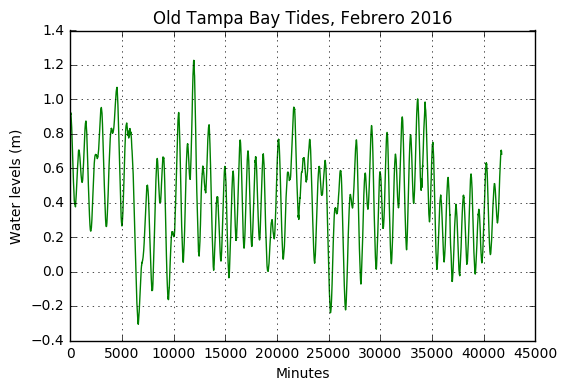

In [19]:
plt.title("Old Tampa Bay Tides, Febrero 2016")
plt.ylabel('Water levels (m)')
plt.xlabel('Minutes')
plt.grid(True)

x=df["Tiempo"]
y=df["WLevel"]

plt.plot(x,y,'g-')

plt.show()